# Week 2 task - Data Wrangling

### Loading dataset 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
df = pd.read_csv("Online Retail_csv.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


# Identifying missing values

In [38]:
#identifying cols with missing vals
print("No of missing Values in columns: \n", df.isnull().sum())
missing_vals_cust = df["CustomerID"].isnull().sum() #sum of missing vals in customerID
missing_vals_descrp = df["Description"].isnull().sum() #sum of missing vals in description column
total = df["CustomerID"].shape[0]
total
print(f"Percentage of missing values in CustomerID:{round(missing_vals_cust/total * 100)}")
print(f"Percentage of missing values in Description:{missing_vals_descrp/total}")

No of missing Values in columns: 
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Percentage of missing values in CustomerID:25
Percentage of missing values in Description:0.002683107311375157


# Handling missing values

In [39]:
#Number of missing vals in Descrp col is very small, almost insignificant, hence the strategic approach will be to delete thee column
df1 = df.dropna(subset=["Description"])
df1
#The IDs in the customer data are not unique, they are repeated for some customers. 
df2 = df1.fillna(method="bfill") #filled the null values with the next CustomerID
df2.isnull().sum()

C:\Users\ayemi\AppData\Local\Temp\ipykernel_19912\2421204777.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2 = df1.fillna(method="bfill") #filled the null values with the next CustomerID


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Checking for duplicate values

In [40]:
dup = df2[df2.duplicated()]
dup
no_dup = df2.drop_duplicates(inplace=True) #Removing all duplicates in the Retail Dataset

## Datatype mismatches 

In [41]:
df2.dtypes
# InvoiceNo, StockCode, description, country and customer ID should be in string formamt
df2["InvoiceNo"] = df2["InvoiceNo"].astype(str)
df2["StockCode"] = df2["StockCode"].astype(str)
df2["Description"] = df2["Description"].astype(str)
df2["CustomerID"] = df2["CustomerID"].astype(str)
df2["Country"] = df2["Country"].astype(str)

## Invalid values - Quantity

In [42]:
df2.loc[df2['Quantity'] < 0, 'Quantity'] = np.nan #replaced negattive values with nan
for i in df2["Quantity"]:
    counter = 0
    if i < 0:
        counter += 1

print("Negative Quantity vals:",counter)


#QUANTITY VALS SHOULD NOT BE NEGATIVE. replaced all negative quantity with nan

Negative Quantity vals: 0


## Checking inconsistent formating in columns

In [43]:
# pattern definitions
invoice_no_pattern = r'^(C)?\d{6}$'
stock_code_pattern = r'^\d{5}$'
description_pattern = r'^(?!\d). + '
quantity_pattern = r'^\d+$'
date_pattern = r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$'
unit_price_pattern = r'^\d+\.\d{2}$'
customer_id_pattern = r'^\d{5}$'
country_pattern = r'^[a-zA-Z\s]+$'

#inconsistencies in Invoice col
inconsistent_invoice = df2[~df2["InvoiceNo"].astype(str).str.match(invoice_no_pattern)]
inconsistent_invoice
#Inconsistencies in stock col
inconsistent_stock = df2[~df2["StockCode"].astype(str).str.match(stock_code_pattern)]
inconsistent_stock

#checkinng inconsistencies in descrp col
inconsistrnt_descrp = df2[~df2["Description"].astype(str).str.match(description_pattern)]

#checking inconsistencies in quantity col
inconsistent_quan = df2[~df2["Quantity"].astype(str).str.match(quantity_pattern)]

#chhecking inconsistencies in date col
inconsistent_date = df2[~df2["InvoiceDate"].astype(str).str.match(date_pattern)]

#checking inconsistencies in prices col
inconsistent_price = df2[~df2["UnitPrice"].astype(str).str.match(unit_price_pattern)]

#checking inconsistencies in customer col
inconsistent_custm = df2[~df2["CustomerID"].astype(str).str.match(customer_id_pattern)]

#checking inconsistencies in country col
inconsistent_ctry = df2[~df2["Country"].astype(str).str.match(country_pattern)]




## Handling the inconsistent formating in columns

In [49]:

#InvoiceNo - remove rows with inconsistency
# df3 = df3[df3["InvoiceNo"].as

#Stock code - remove rows with more than 5 digits i.e only 5 digits should represent a stock code
df2["StockCode"] = df2["StockCode"].str.extract("(\d{5})")

#removing special characters in descrp col
df2['Description'] = df2['Description'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

#Unit Price - convert to standardized rounding decimal places
df2["UnitPrice"] = df2["UnitPrice"].round(2)

# Country - country name sshould be in title case
df2["Country"] = df2["Country"].str.title()



In [51]:
df2.describe()
# Minimumm value for unit price is negative, so we ned to remove negative values as they are  not needed


,Quantity,UnitPrice
count,525462.000000,535187.000000
mean,10.681024,4.645242
std,157.399272,97.364810
min,1.000000,-11062.060000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,11.000000,4.130000
max,80995.000000,38970.000000


In [54]:
df2 = df2[df2["UnitPrice"]>0]
df2.describe()

,Quantity,UnitPrice
count,524874.000000,524874.000000
mean,10.616674,3.922602
std,156.280624,36.093163
min,1.000000,0.040000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,11.000000,4.130000
max,80995.000000,13541.330000


# Outliers -Quantity

Text(0.5, 1.0, 'UnitPrice')

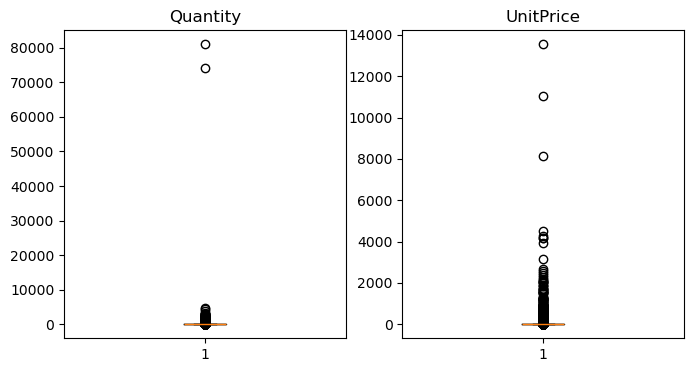

In [67]:
# Numerical columnds are the quantity and unitprice cols, so i'll be using box plot viusalisation to show the outliers of each columns

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
#Quantity: Most values are within the range of 0 to 10000,  and there are two outluiers around 70000 and 80000
axes[0].boxplot(df2["Quantity"])
axes[0].set_title("Quantity")
#UnitPrice: Values are within the range of 1 and 4000, 3 ooutliers present between 8000 and 14000
axes[1].boxplot(df2["UnitPrice"])
axes[1].set_title("UnitPrice")


## Cleaned data

In [71]:
df2.to_csv("cleaned_retail.csv", index=False)